# What type of films win the most awards?

So our group questions covered the topics concerning profits vs number of international releases, and also production budgets vs Academy Awards. I wanted to expand a bit on the Academy Award topic, given that an award nomination not only greatly increases profits, but heightens the reputation of the film studio. 

If we could get a bit more insight into what genres of movies are more likely to win an award recently, then we can infer that Microsoft should aim to create a movie of that genre. 

Let's get started by importing our data.

In [1]:
import pandas as pd
import os
import sqlite3

## Import Data Tables 

Let's bring in and view our initial scraped award table that we used in our Group Question

In [2]:
conn = sqlite3.connect("movies_db.sqlite") 
cur = conn.cursor()

In [3]:
cur.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('tmdb_movies',),
 ('imdb_title_akas',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_basics',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('imdb_title_principals',),
 ('films_by_awards.csv',),
 ('films_by_awards',),
 ('films_by_awards1',),
 ('films_by_awards2',),
 ('tn_movie_budgets2',),
 ('tn_movie_budgets_clean',)]

As we have already created SQL tables in our group question notebook, we will skip to viewing the dataframes from those SQL tables.

In [4]:
cur.execute('''SELECT *
               FROM films_by_awards2                
                ''') 

nominated_films_df = pd.DataFrame(cur.fetchall())
nominated_films_df.columns = [x[0] for x in cur.description]
nominated_films_df

,index,Unnamed: 0,film,year,awards,nominations
0,0,0,Parasite,2019,4,6
1,1,1,Ford v Ferrari,2019,2,4
2,2,2,Learning to Skateboard in a Warzone (If You're...,2019,1,1
3,3,3,The Neighbors' Window,2019,1,1
4,4,4,Little Women,2019,1,6
...,...,...,...,...,...,...
1311,1311,1311,The Yankee Doodle Mouse,1943,1,1
1312,1312,1312,The Yearling,1946,2,7
1313,1313,1313,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1314,1314,1314,You Can't Take It with You,1938,2,7


In [5]:
nominated_films_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 6 columns):
index          1316 non-null int64
Unnamed: 0     1316 non-null int64
film           1316 non-null object
year           1316 non-null object
awards         1316 non-null object
nominations    1316 non-null object
dtypes: int64(2), object(4)
memory usage: 61.8+ KB


In [6]:
nominated_films_df['year'].unique()

array(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1927/28',
       '1954', '1949', '1938', '1951', '1943', '1960', '1953', '1957',
       '1950', '1929/30', '1941', '1958', '1963', '1956', '1945', '1946',
       '1936', '1940', '1937', '1947', '1952', '1931/32', '1942', '1964',
       '1959', '1948', '1962', '1961', '1928/29', '1955', '1935', '1939',
       '1932/33', '1930/31', '1934', '1944'], dtype=object)

## Cleaning Data

Let's clean up these values containing two years, so that we can figure out how many films were awarded most recently (since 2010).

In [7]:
value_split = nominated_films_df['year'].str.split('/')

In [8]:
nominated_films_df['year'] = value_split.str.get(0).astype('int')

In [9]:
nominated_films_df['year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1927, 1954, 1949, 1938, 1951, 1943, 1960, 1953, 1957, 1950, 1929,
       1941, 1958, 1963, 1956, 1945, 1946, 1936, 1940, 1937, 1947, 1952,
       1931, 1942, 1964, 1959, 1948, 1962, 1961, 1928, 1955, 1935, 1939,
       1932, 1930, 1934, 1944])

Let's see how many films were awarded since 2010.

In [10]:
newest_films = nominated_films_df['year'] > 2010    
newest_films.value_counts()

False    1180
True      136
Name: year, dtype: int64

We have 136 films that were awarded since 2010.

Now let's view a table that contains films and their respective genres since 2010.

In [11]:
cur.execute('''SELECT *
               FROM imdb_title_basics
               ORDER BY start_year
                ''') 

movies_df = pd.DataFrame(cur.fetchall())
movies_df.columns = [x[0] for x in cur.description]
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
1,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
2,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
3,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama
4,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi"
...,...,...,...,...,...,...
146139,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
146140,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
146141,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
146142,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"


## Joining Awards Data to Genre Data

Let's do an inner-join of this imdb_title_basics table to our Awards data and hopefully we will have genre info for most of the recently-nominated films.

In [12]:
cur.execute('''SELECT a.film, a.year, a.awards, a.nominations, b.genres
               FROM films_by_awards2 a
               JOIN imdb_title_basics b 
               ON a.film = b.primary_title
               AND a.year = b.start_year
                ''') 

awards_to_genres_df = pd.DataFrame(cur.fetchall())
awards_to_genres_df.columns = [x[0] for x in cur.description]
awards_to_genres_df

,film,year,awards,nominations,genres
0,Parasite,2019,4,6,"Action,Horror,Sci-Fi"
1,Parasite,2019,4,6,"Drama,Thriller"
2,Ford v Ferrari,2019,2,4,"Action,Biography,Drama"
3,Little Women,2019,1,6,"Drama,Romance"
4,Jojo Rabbit,2019,1,6,"Comedy,Drama,War"
...,...,...,...,...,...
115,Alice in Wonderland,2010,2,3,"Fantasy,Musical"
116,Black Swan,2010,1,5,"Drama,Thriller"
117,In a Better World,2010,1,1,"Drama,Romance"
118,The Wolfman,2010,1,1,"Drama,Fantasy,Horror"


We are left with 120 rows, and some apparent duplicates. Let's drop those duplicates below:

### Cleaning Duplicated Data

In [13]:
awards_to_genres_df.drop_duplicates(subset='film', keep='last', inplace=True)

In [14]:
awards_to_genres_df[:50]

,film,year,awards,nominations,genres
1,Parasite,2019,4,6,"Drama,Thriller"
2,Ford v Ferrari,2019,2,4,"Action,Biography,Drama"
3,Little Women,2019,1,6,"Drama,Romance"
4,Jojo Rabbit,2019,1,6,"Comedy,Drama,War"
5,Toy Story 4,2019,1,2,"Adventure,Animation,Comedy"
6,Joker,2019,2,11,"Crime,Drama,Thriller"
7,1917,2019,3,10,"Drama,War"
8,Judy,2019,1,2,"Biography,Drama,History"
9,Rocketman,2019,1,1,"Biography,Drama,Music"
10,American Factory,2019,1,1,Documentary


We are now left with the most recent 114 award winning films, and their attributed genres. Not too bad! My general thought for this data is that using the most recent 10 years of films would give a more accurate representation of the distribution of genres that are more likely to get awarded in the near future.

Let's get to work on creating a column for each genre, starting by splitting each row's list of genres.

## Reformatting Data 

In [15]:
awards_to_genres_df['genres'] = awards_to_genres_df['genres'].apply(lambda x: x.split(",") if x in x else x)

#the above iterates through each rows for genre, splitting from the comma if a comma is contained

In [37]:
awards_to_genres_df['genres'].head()

1                 [Drama, Thriller]
2        [Action, Biography, Drama]
3                  [Drama, Romance]
4              [Comedy, Drama, War]
5    [Adventure, Animation, Comedy]
Name: genres, dtype: object

Let's make a new set, by iterating through each separated value in genres with a for loop

In [17]:
all_genres = set()                      
for genres in awards_to_genres_df['genres']:
    if genres:
        all_genres.update(genres)

In [18]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Now let's iterate through each genre, creating a new column for each iteration (each genre) and assigning it a 0 value

In [19]:
for genre in all_genres:
    awards_to_genres_df[genre] = np.zeros(shape=awards_to_genres_df.shape[0])
                                
awards_to_genres_df.head()

,film,year,awards,nominations,genres,Sport,Musical,Action,Comedy,Thriller,...,Music,Fantasy,Crime,Western,Horror,Mystery,Adventure,Biography,Romance,History
1,Parasite,2019,4,6,"[Drama, Thriller]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ford v Ferrari,2019,2,4,"[Action, Biography, Drama]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Little Women,2019,1,6,"[Drama, Romance]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jojo Rabbit,2019,1,6,"[Comedy, Drama, War]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Toy Story 4,2019,1,2,"[Adventure, Animation, Comedy]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for index, row in awards_to_genres_df.iterrows():   #iterates through the dataframe rows as pairs of index and row
    if row['genres']:                               #if the row contains the genres:
        for genre in row['genres']:                 #for each iteration (genre) of the genres list, 
            awards_to_genres_df.loc[index, genre] = 1                  #the column for that genre get a 1

awards_to_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1 to 119
Data columns (total 26 columns):
film           114 non-null object
year           114 non-null object
awards         114 non-null object
nominations    114 non-null object
genres         114 non-null object
Sport          114 non-null float64
Musical        114 non-null float64
Action         114 non-null float64
Comedy         114 non-null float64
Thriller       114 non-null float64
Drama          114 non-null float64
Sci-Fi         114 non-null float64
War            114 non-null float64
Animation      114 non-null float64
Family         114 non-null float64
Documentary    114 non-null float64
Music          114 non-null float64
Fantasy        114 non-null float64
Crime          114 non-null float64
Western        114 non-null float64
Horror         114 non-null float64
Mystery        114 non-null float64
Adventure      114 non-null float64
Biography      114 non-null float64
Romance        114 non-null float64


Now all of our values in each column is filled.

In [21]:
awards_to_genres_df.head()

,film,year,awards,nominations,genres,Sport,Musical,Action,Comedy,Thriller,...,Music,Fantasy,Crime,Western,Horror,Mystery,Adventure,Biography,Romance,History
1,Parasite,2019,4,6,"[Drama, Thriller]",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ford v Ferrari,2019,2,4,"[Action, Biography, Drama]",0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Little Women,2019,1,6,"[Drama, Romance]",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Jojo Rabbit,2019,1,6,"[Comedy, Drama, War]",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Toy Story 4,2019,1,2,"[Adventure, Animation, Comedy]",0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We can now drop our old column of genre lists.

In [22]:
awards_to_genres_df2 = awards_to_genres_df.drop(columns = 'genres')

In [23]:
awards_to_genres_df2

,film,year,awards,nominations,Sport,Musical,Action,Comedy,Thriller,Drama,...,Music,Fantasy,Crime,Western,Horror,Mystery,Adventure,Biography,Romance,History
1,Parasite,2019,4,6,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ford v Ferrari,2019,2,4,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Little Women,2019,1,6,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Jojo Rabbit,2019,1,6,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Toy Story 4,2019,1,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Alice in Wonderland,2010,2,3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,Black Swan,2010,1,5,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,In a Better World,2010,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,The Wolfman,2010,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Looking good- let's just quickly check our nominations and awards columns for value cleanliness.

In [24]:
awards_to_genres_df['nominations'].unique()

array(['6', '4', '2', '11', '10', '1', '5', '7', '8', '3', '13', '14',
       '12', '9'], dtype=object)

In [25]:
awards_to_genres_df['awards'].unique()

array(['4', '2', '1', '3', '6', '7', '5'], dtype=object)

Now, let's make a list of each column and assign the genre columns to a variable.

## Extracting the Specific Data We Need

In [26]:
cols = list(awards_to_genres_df.columns)
cols

['film',
 'year',
 'awards',
 'nominations',
 'genres',
 'Sport',
 'Musical',
 'Action',
 'Comedy',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'War',
 'Animation',
 'Family',
 'Documentary',
 'Music',
 'Fantasy',
 'Crime',
 'Western',
 'Horror',
 'Mystery',
 'Adventure',
 'Biography',
 'Romance',
 'History']

In [27]:
genre_cols = cols[5:]

let's create a dictionary of genres to store their respective value counts

In [38]:
nominated_genre_count = {}       
for col in genre_cols:                       #iterate through the genre cols to only add genres where the count is 1 and add them to a dictionary
    count = np.sum(awards_to_genres_df[col] == 1).sum() 
    nominated_genre_count[col] = count

In [29]:
nominated_genre_count

{'Sport': 3,
 'Musical': 2,
 'Action': 12,
 'Comedy': 19,
 'Thriller': 16,
 'Drama': 78,
 'Sci-Fi': 9,
 'War': 3,
 'Animation': 10,
 'Family': 5,
 'Documentary': 9,
 'Music': 8,
 'Fantasy': 7,
 'Crime': 8,
 'Western': 1,
 'Horror': 4,
 'Mystery': 5,
 'Adventure': 24,
 'Biography': 32,
 'Romance': 14,
 'History': 12}

Now let's sort this dictionary by number of nominations!

In [30]:
sorted_genre_count = {k: v for k, v in sorted(nominated_genre_count.items(), key=lambda item: item[1])}

#here, we iterated through each key-value pair and assigned the sorting key based on the second [1] item, the value


In [31]:
sorted_genre_count

{'Western': 1,
 'Musical': 2,
 'Sport': 3,
 'War': 3,
 'Horror': 4,
 'Family': 5,
 'Mystery': 5,
 'Fantasy': 7,
 'Music': 8,
 'Crime': 8,
 'Sci-Fi': 9,
 'Documentary': 9,
 'Animation': 10,
 'Action': 12,
 'History': 12,
 'Romance': 14,
 'Thriller': 16,
 'Comedy': 19,
 'Adventure': 24,
 'Biography': 32,
 'Drama': 78}

Now we are separating the keys and values of the dictionary for plotting.

In [32]:
genres = list(sorted_genre_count.keys())
number_nominated = list(sorted_genre_count.values())

## Exploring Visualization

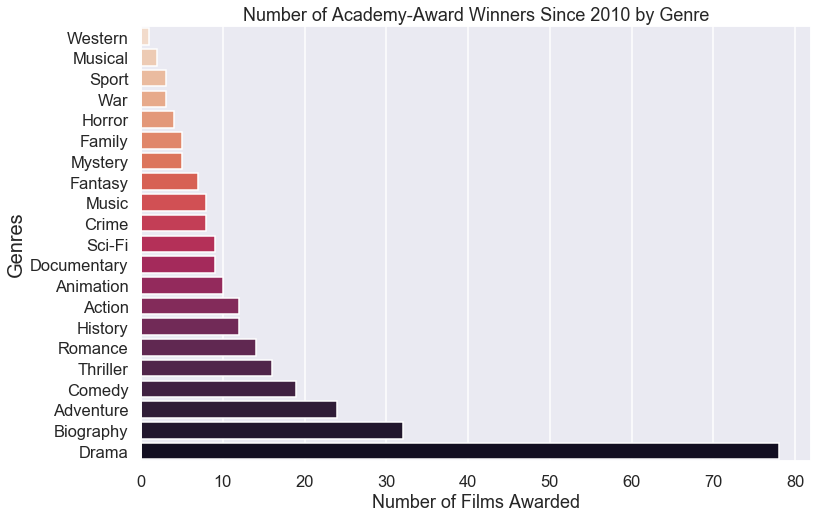

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", context="talk")

f, (ax1) = plt.subplots(figsize=(12, 8), sharex=True)

sns.barplot(x=number_nominated, y=genres, palette=("rocket_r"), ax=ax1)
ax1.set_ylabel("Genres", fontsize=20)
ax1.set_xlabel("Number of Films Awarded")
ax1.set_title("Number of Academy-Award Winners Since 2010 by Genre");

This chart tells us that Drama films win the most Academy Awards by far! With Biographies and Aventure films following in 2nd and 3rd, respectively.

As most films are a combination of 2 or 3 genres, I would suggest Microsoft ties dramatic themes to their films, and not stick by purely action or purely sci-fi for example. 